In [1]:
import numpy as np
import random
import time

In [2]:
# inference 预测y
def inference(w,b,x):
    pred_y = w * x + b
    return pred_y


In [3]:
#cost function
def eval_loss(w,b,x_list,gt_y_list):
    avg_loss = 0
    for i in range(len(x_list)):
        avg_loss += 0.5 * (w * x_list[i] + b - gt_y_list[i]) ** 2
    avg_loss /= len(gt_y_list)
    return avg_loss

In [4]:
#单个样本带来的梯度
def gradient(pred_y, gt_y, x):
    diff = pred_y - gt_y
    dw = diff * x
    db = diff
    return dw,db

In [5]:
#全部样本（batchsize）为w,b带来的更新
def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b ,lr):
    avg_dw, avg_db = 0, 0
    batch_size = len(batch_x_list)
    for i in range(batch_size):
        pred_y = inference(w, b, batch_x_list[i])
        dw, db = gradient(pred_y, batch_gt_y_list[i], batch_x_list[i])
        avg_dw += dw
        avg_db += db
    avg_dw /= batch_size
    avg_db /= batch_size
    w -= lr * avg_dw
    b -= lr * avg_db
    return w,b

In [12]:
def gen_sample_data():
    w = random.randint(0,10) + random.random()
    b = random.randint(0, 5) + random.random()
    
    num_sample = 100
    x_list = []
    y_list = []
    print(w,b)
    for i in range(num_sample):
        x = random.randint(0,100) * random.random()
        y = w * x + b + random.random() * random.randint(-1, 100)
        
        x_list.append(x)
        y_list.append(y)
        
    return x_list, y_list

2.3173640251996277 5.307789244431271


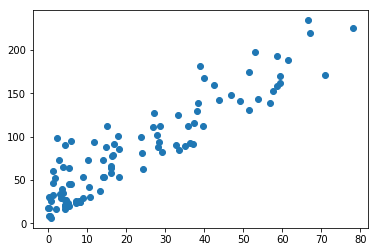

In [13]:
x_list, y_list = gen_sample_data()

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_list, y_list)
plt.show()

In [8]:
def train(x_list, gt_y_list, batch_size, lr, max_iter):
    w = 0
    b = 0
    num_samples = len(x_list)
    for i in range(max_iter):
        batch_idxs = np.random.choice(len(x_list), batch_size) #随机抽取batch_size个样本的索引值
        batch_x = [x_list[j] for j in batch_idxs]
        batch_y = [gt_y_list[j] for j in batch_idxs]
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        print('w:{0},b:{1}'.format(w,b))
        print('loss is {}'.format(eval_loss(w,b,x_list,gt_y_list)))
        time.sleep(0.1)
        
    return w,b

In [9]:
train(x_list, y_list, 100, 0.001, 100)

w:8.439478174941655,b:0.20328369110644673
loss is 417.815037273764
w:8.613865344771394,b:0.22277390048215906
loss is 411.50922211934346
w:8.438220202894867,b:0.2300140634485348
loss is 417.54166240168365
w:8.627364523281157,b:0.24778717125388944
loss is 412.2508487916732
w:8.486079987809601,b:0.258861798055052
loss is 411.8136424385221
w:8.598912465364293,b:0.27323068653921195
loss is 409.9823344803814
w:8.575515099189776,b:0.2891556427282148
loss is 408.87110954305086
w:8.417012825713734,b:0.29620263629069427
loss is 419.6053154970967
w:8.548090263953458,b:0.31295534487093735
loss is 408.29700896704986
w:8.494552518614062,b:0.3261437432376681
loss is 410.14467561445616
w:8.585993256755655,b:0.3416599866508296
loss is 408.5291975981259
w:8.684930756692308,b:0.35637055123074296
loss is 418.0176163166468
w:8.406596528362117,b:0.36377893076750883
loss is 420.17626738705553
w:8.676593091184891,b:0.3837763773801978
loss is 416.47241260622104
w:8.56018586351299,b:0.39596038084916674
loss is 

(8.714569446775501, 1.5183248788242265)